In this chapter, you'll be introduced to the problem you'll be solving in this course. How do you accurately classify line-items in a school budget based on what that money is being used for? You will explore the raw text and numeric values in the dataset, both quantitatively and visually. And you'll learn how to measure success when trying to predict class labels for each row of the dataset.

In [6]:
# import packages
import pandas as pd

df = pd.read_csv('../datasets/School_Budgeting_Training_data.csv', index_col=0)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


# Exploring the data

### Summarizing the data

You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called ```df```.

You can use ```df.info()``` in the IPython Shell to determine which columns of the data are numeric, specifically type ```float64```. You'll notice that there are two numeric columns, called ```FTE``` and ```Total```.

    FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
    
    Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null ```FTE``` column to see the distribution of part-time and full-time employees in the dataset.

              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.446867e+04
std      0.452844  7.916752e+04
min     -0.002369 -1.044084e+06
25%      0.004310  1.108111e+02
50%      0.440000  7.060299e+02
75%      1.000000  5.347760e+03
max      1.047222  1.367500e+06


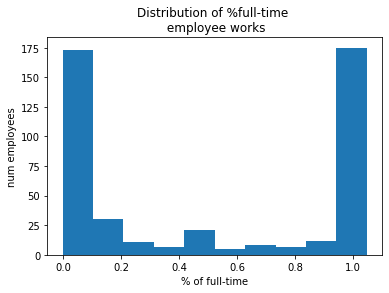

In [7]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram of not null values in the FTE column.
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

# Looking at the datatypes

### Encode the labels as categorical variables

Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a ```list``` called ```LABELS```. In the Shell, check out the type for these labels using ```df[LABELS].dtypes```.

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the ```.astype()``` method.

Note: ```.astype()``` only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the ```.apply()``` method and provide a ```lambda``` function called ```categorize_label``` that applies ```.astype()``` to each column, ```x```.

In [20]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [21]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


### Counting unique labels

As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe df and the ```LABELS``` list have been loaded into the workspace; the LABELS columns of df have been converted to category types.

pandas, which has been pre-imported as ```pd```, provides a pd.Series.nunique method for counting the number of unique values in a Series.

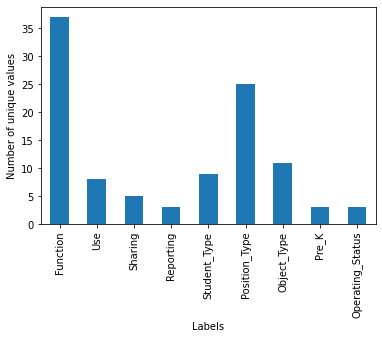

In [22]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar', )

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

# How do we measure success?

### Computing log loss with NumPy

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function ```compute_log_loss()```, which Peter showed you in the video.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: ```actual_labels```, ```correct_confident```, ```correct_not_confident```, ```wrong_not_confident```, and ```wrong_confident```.

Your job is to compute the log loss for each sample set provided using the ```compute_log_loss(predicted_values, actual_values)```. It takes the predicted values as the first argument and the actual values as the second argument.

[sklearn.metrics.log_loss Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)

In [30]:
# set up variables needed for the following panel.
from sklearn.metrics import log_loss
import numpy as np

# build 
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

def compute_log_loss(test_vals, true_vals):
    return log_loss(y_true=true_vals, y_pred=test_vals)

In [31]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.992007221626413e-16
